In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

from collections import Counter
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
from IPython.display import display, HTML

palette_c = ['#ceddf0', '#94cce7', '#21a2d0', '#128aa3', '#1c62ba']
app = ['Apple Music', 'Tidal']

df_user = pd.read_csv('./users-time.csv', sep = ';', index_col = 0)
display(df_user)
df = df_user.iloc[:,:6]
df

,Task 1 Apple Music,Task 2 Apple Music,Task 3 Apple Music,Task 1 Tidal,Task 2 Tidal,Task 3 Tidal,Sesso,Eta,Lavoro,Istruzione
User,,,,,,,,,,
UT1,0.35-C,1.15-C,1.07-C,0.35-C,1.47-A,0.43-C,F,23,Lavorator*,Diploma
UT2,2.53-A,3.08-F,1.58-A,3.13-A,2.45-F,3.10-F,F,52,Lavorator*,Diploma
UT3,1.15-A,0.48-C,0.58-C,1.05-C,3.17-F,1.47-A,M,55,Lavorator*,Diploma
UT4,0.16-C,0.38-C,0.28-C,0.10-C,1.30-A,0.30-C,F,22,Student*,Diploma
UT5,0.12-C,1.01-A,0.07-C,0.12-C,0.54-C,0.21-C,F,22,Student*,Laurea triennale
UT6,0.22-C,0.41-C,0.09-C,0.10-C,0.29-C,0.33-C,M,24,Student*,Laurea triennale
UT7,0.18-C,0.25-C,0.07-C,0.12-C,0.27-C,0.35-C,F,20,Student*,Diploma
UT8,0.17-C,0.31-C,0.17-C,0.28-C,0.41-C,0.20-C,F,26,Lavorator*,Laurea magistrale
UT9,1.59-A,1.50-A,0.57-C,0.23-C,2.57-A,1.22-C,M,12,Student*,Elementari


,Task 1 Apple Music,Task 2 Apple Music,Task 3 Apple Music,Task 1 Tidal,Task 2 Tidal,Task 3 Tidal
User,,,,,,
UT1,0.35-C,1.15-C,1.07-C,0.35-C,1.47-A,0.43-C
UT2,2.53-A,3.08-F,1.58-A,3.13-A,2.45-F,3.10-F
UT3,1.15-A,0.48-C,0.58-C,1.05-C,3.17-F,1.47-A
UT4,0.16-C,0.38-C,0.28-C,0.10-C,1.30-A,0.30-C
UT5,0.12-C,1.01-A,0.07-C,0.12-C,0.54-C,0.21-C
UT6,0.22-C,0.41-C,0.09-C,0.10-C,0.29-C,0.33-C
UT7,0.18-C,0.25-C,0.07-C,0.12-C,0.27-C,0.35-C
UT8,0.17-C,0.31-C,0.17-C,0.28-C,0.41-C,0.20-C
UT9,1.59-A,1.50-A,0.57-C,0.23-C,2.57-A,1.22-C


In [3]:
# creating df with only-time

# get_time_s('2.03-A') -> 123 (secons)
def get_time_s(text):
    times = text.split('-')[0].split('.')
    seconds = int(times[0]) * 60
    seconds += int(times[1])
    return seconds

df_time = df.applymap(get_time_s)
df_time

,Task 1 Apple Music,Task 2 Apple Music,Task 3 Apple Music,Task 1 Tidal,Task 2 Tidal,Task 3 Tidal
User,,,,,,
UT1,35,75,67,35,107,43
UT2,173,188,118,193,165,190
UT3,75,48,58,65,197,107
UT4,16,38,28,10,90,30
UT5,12,61,7,12,54,21
UT6,22,41,9,10,29,33
UT7,18,25,7,12,27,35
UT8,17,31,17,28,41,20
UT9,119,110,57,23,177,82


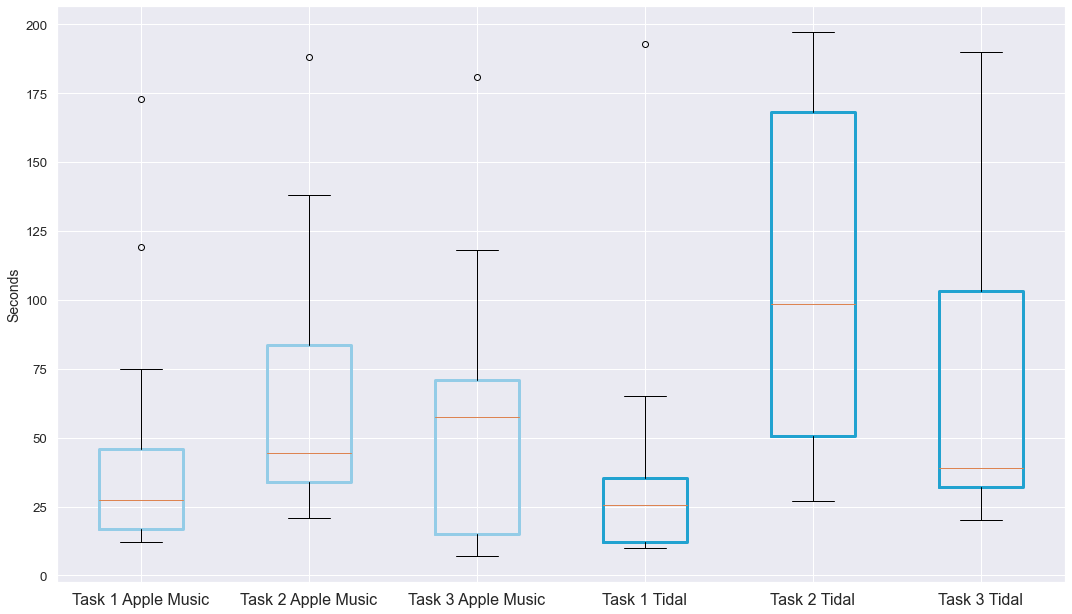

In [63]:
# default pandas:
# df_time.boxplot(figsize=(17,10))

fig = plt.figure(figsize = (14, 8))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(df_time)
for box in bp['boxes']:
    # change outline color
    box.set(color='#7570a3', linewidth=3)
    # change fill color
    #box.set(color = 'b')
bp['boxes'][0].set(color = palette_c[1])
bp['boxes'][1].set(color = palette_c[1])
bp['boxes'][2].set(color = palette_c[1])
bp['boxes'][3].set(color = palette_c[2])
bp['boxes'][4].set(color = palette_c[2])
bp['boxes'][5].set(color = palette_c[2])
#plt.grid()
plt.ylabel('Seconds', fontsize = 14)
ax.set_xticklabels(df_time.columns, fontsize = 16)
colors = ['deepskyblue', 'royalblue', 'steelblue', 'deepskyblue', 'royalblue', 'steelblue']
#for xtick, color in zip(ax.get_xticklabels(), colors):
#    xtick.set_color(color)
plt.show()

Task e tempi di esecuzione (Efficienza):

Task 1


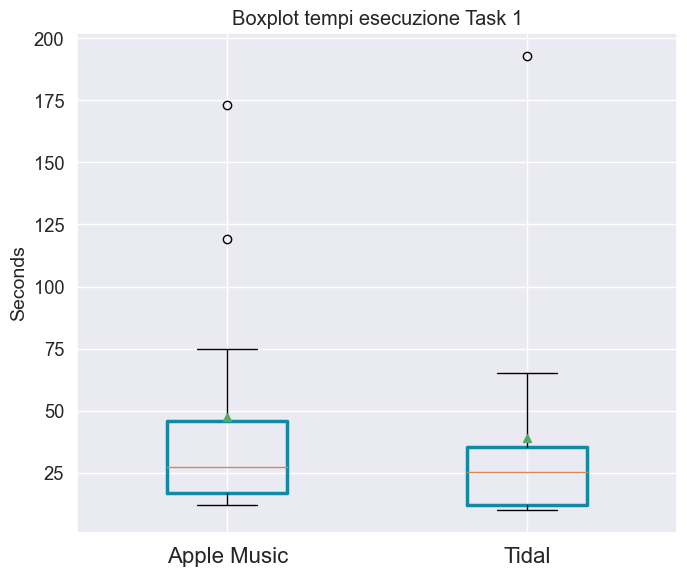

,Min,Max,Media,Std,Mediana
Apple Music,12,173,47.416667,50.462332,27.5
Tidal,10,193,39.083333,51.085416,25.5




______________________________________________________________________________

Task 2


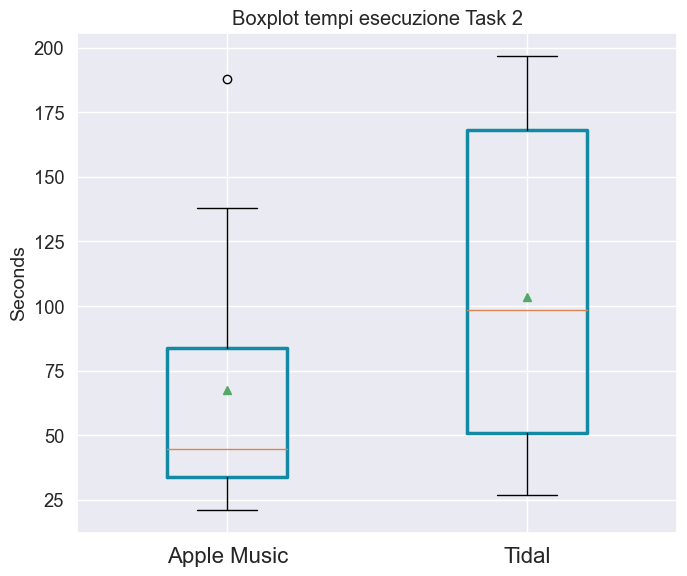

,Min,Max,Media,Std,Mediana
Apple Music,21,188,67.583333,51.965825,44.5
Tidal,27,197,103.5,63.501611,98.5




______________________________________________________________________________

Task 3


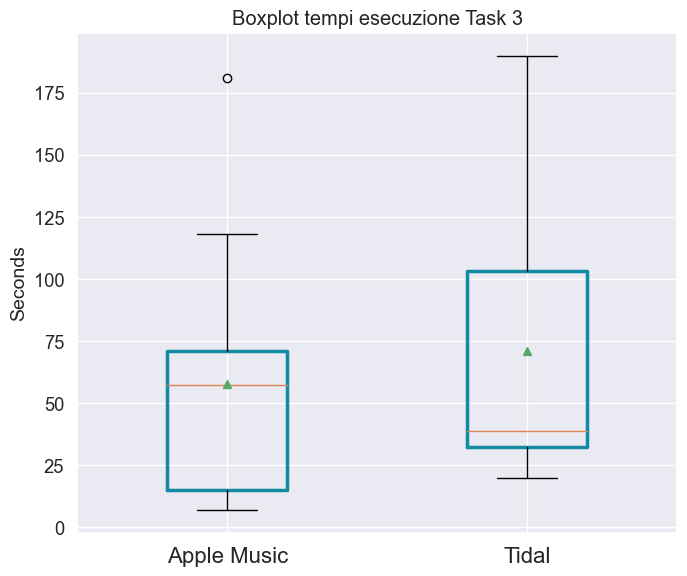

,Min,Max,Media,Std,Mediana
Apple Music,7,181,57.75,51.69337,57.5
Tidal,20,190,71.083333,56.566065,39.0


In [70]:
def task_boxplot(num_task):
    fig = plt.figure(figsize = (6, 5), dpi=100)
    ax = fig.add_axes([0, 0, 1, 1])
    dati = df_time[[f'Task {num_task} {app[0]}', f'Task {num_task} {app[1]}']]
    bp = ax.boxplot(dati, widths = 0.4, showmeans=True)
    for box in bp['boxes']:
        # change outline color
        box.set(color=palette_c[3], linewidth=2.5)
    plt.ylabel('Seconds', fontsize = 14)
    ax.set_xticklabels(app, fontsize = 16)
    plt.title(f'Boxplot tempi esecuzione Task {num_task}')
    plt.show()

    stats = pd.DataFrame(index=app, columns=['Min', 'Max', 'Media', 'Std', 'Mediana'])
    for ele in app:
        stats.loc[ele, 'Min'] = dati[f'Task {num_task} {ele}'].min()
        stats.loc[ele, 'Max'] = dati[f'Task {num_task} {ele}'].max()
        stats.loc[ele, 'Media'] = dati[f'Task {num_task} {ele}'].mean()
        stats.loc[ele, 'Std'] = dati[f'Task {num_task} {ele}'].std()
        stats.loc[ele, 'Mediana'] = dati[f'Task {num_task} {ele}'].median()
    return stats

print('Task e tempi di esecuzione (Efficienza):\n')
print('Task 1')
display(task_boxplot(1))
print('\n\n______________________________________________________________________________\n')
print('Task 2')
display(task_boxplot(2))
print('\n\n______________________________________________________________________________\n')
print('Task 3')
display(task_boxplot(3))


In [5]:
def get_help(text):
    h = text.split('-')[1]
    if h == 'C':
        # completato
        h = 1
    elif h == 'A':
        # aiutato
        h = 2
    elif h == 'F':
        # fail
        h = 3
    return h

df_help = df.applymap(get_help)
df_help

,Task 1 Apple Music,Task 2 Apple Music,Task 3 Apple Music,Task 1 Tidal,Task 2 Tidal,Task 3 Tidal
User,,,,,,
UT1,1,1,1,1,2,1
UT2,2,3,2,2,3,3
UT3,2,1,1,1,3,2
UT4,1,1,1,1,2,1
UT5,1,2,1,1,1,1
UT6,1,1,1,1,1,1
UT7,1,1,1,1,1,1
UT8,1,1,1,1,1,1
UT9,2,2,1,1,2,1


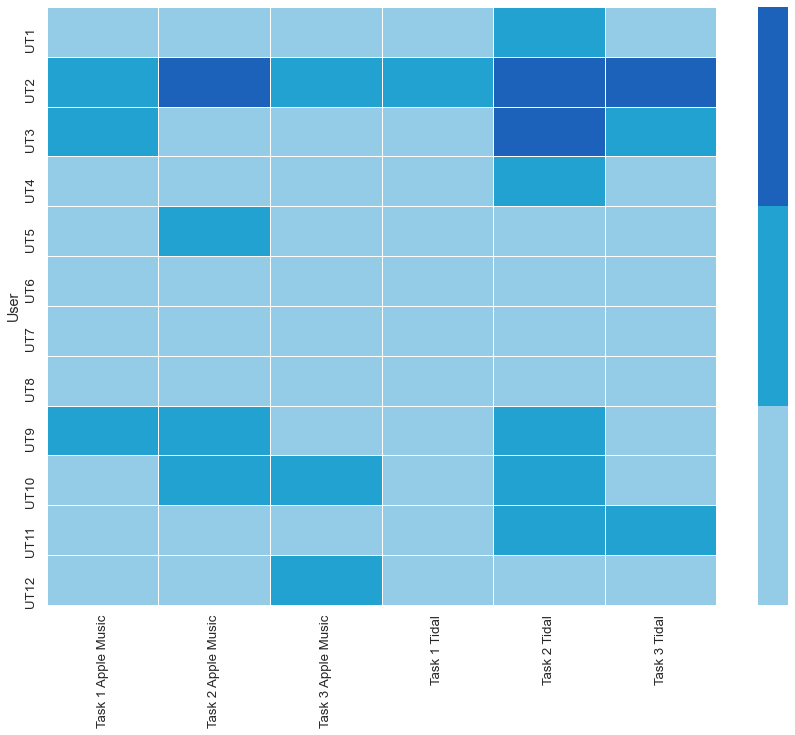

In [6]:
myColors = (palette_c[1], palette_c[2], palette_c[4])

sns.set(font_scale=1.2)
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
fig, ax = plt.subplots(figsize = (15, 11)) 
ax = sns.heatmap(df_help, linewidths=.5, fmt='g', cmap=cmap, ax = ax)
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-0.667, 0, 0.667])
colorbar.set_ticklabels(['Completato', 'Completato con aiuto', 'Non completato'])
plt.savefig('./fig/' + 'user test matrice' + '.png')

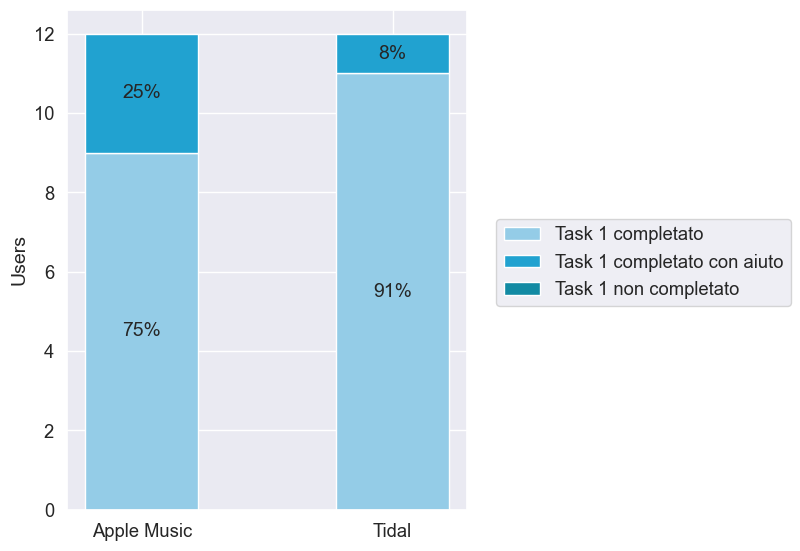

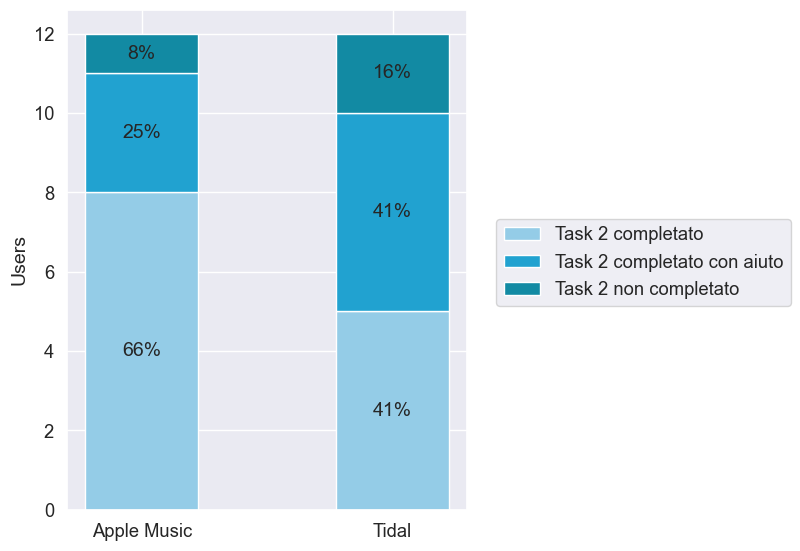

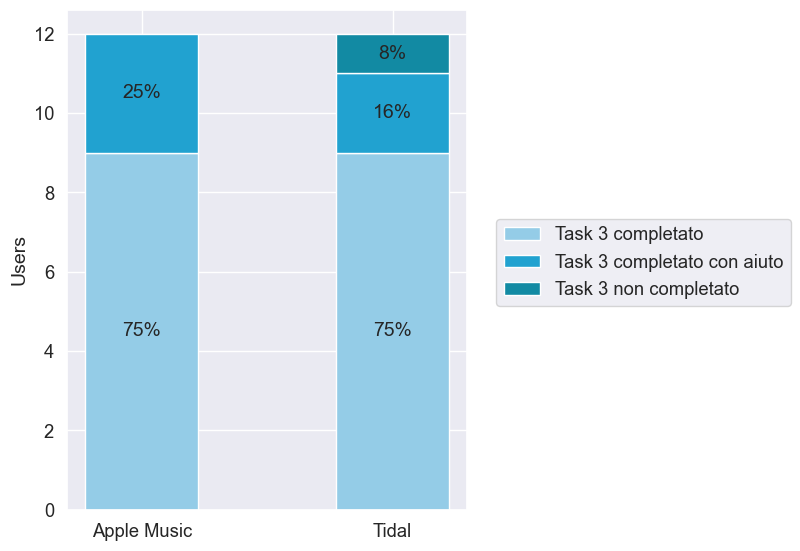

In [7]:

def barplot_task(num_task, df_help):

    # count the number of complete (1), help (2) and uncomplete(3) for each app
    count_music = {}
    count_tidal = {}
    width = 0.45
    tot_users = len(df_help)

    # number of users that completed the task n 1 of apple music
    # number of users that got help in task n 1 of apple music
    # number of users that didn't complete the task n 1 of apple music
    count_music['comp'] = len(df_help[df_help[f'Task {num_task} {app[0]}'] == 1])
    count_music['help'] = len(df_help[df_help[f'Task {num_task} {app[0]}'] == 2])
    count_music['uncomp'] = len(df_help[df_help[f'Task {num_task} {app[0]}'] == 3])

    count_tidal['comp'] = len(df_help[df_help[f'Task {num_task} {app[1]}'] == 1])
    count_tidal['help'] = len(df_help[df_help[f'Task {num_task} {app[1]}'] == 2])
    count_tidal['uncomp'] = len(df_help[df_help[f'Task {num_task} {app[1]}'] == 3])

    fig = plt.figure(figsize = (4, 5), dpi = 100)
    ax = fig.add_axes([0, 0, 1, 1])

    # Apple Music completed, helped, uncompleted
    percent = int(count_music['comp']/tot_users*100)
    if percent != 0:
        ax.bar(1, count_music['comp'], width, label = f'Task {num_task} completato ({app[0]})', color = palette_c[1])
        plt.annotate(f'{percent}%', (1, count_music['comp']/2), ha='center', va='center', size = 14)

    tot_helped = tot_users - count_music['comp'] - count_music['uncomp']
    start_base = count_music['comp']
    percent = int(tot_helped/tot_users*100)
    if percent != 0:
        ax.bar(1, tot_helped, width, bottom = start_base, label = f'Task {num_task} completato con aiuto ({app[0]})', color = palette_c[2])
        plt.annotate(f'{percent}%', (1, tot_helped/2 + start_base), ha='center', va='center', size = 14)

    tot_uncomp = tot_users - count_music['comp'] - count_music['help']
    start_base = count_music['comp'] + tot_helped
    percent = int(tot_uncomp/tot_users*100)
    if percent != 0:
        ax.bar(1, tot_uncomp, width, bottom = start_base, label = f'Task {num_task} non completato ({app[0]})', color = palette_c[3])
        plt.annotate(f'{percent}%', (1, tot_uncomp/2 + start_base), ha='center', va='center', size = 14)


    # Tidal completed, helped, uncompleted
    percent = int(count_tidal['comp']/tot_users*100)
    if percent != 0:
        ax.bar(2, count_tidal['comp'], width, label = f'Task {num_task} completato ({app[1]})', color = palette_c[1])
        plt.annotate(f'{percent}%', (2, count_tidal['comp']/2), ha='center', va='center', size = 14)

    tot_helped = tot_users - count_tidal['comp'] - count_tidal['uncomp']
    start_base = count_tidal['comp']
    percent = int(tot_helped/tot_users*100)
    if percent != 0:
        ax.bar(2, tot_helped, width, bottom = start_base, label = f'Task {num_task} completato con aiuto ({app[1]})', color = palette_c[2])
        plt.annotate(f'{percent}%', (2, tot_helped/2 + start_base), ha='center', va='center', size = 14)

    tot_uncomp = tot_users - count_tidal['comp'] - count_tidal['help']
    start_base = count_tidal['comp'] + tot_helped
    percent = int(tot_uncomp/tot_users*100)
    if percent != 0:
        ax.bar(2, tot_uncomp, width, bottom = start_base, label = f'Task {num_task} non completato ({app[1]})', color = palette_c[3])
        plt.annotate(f'{percent}%', (2, tot_uncomp/2 + start_base), ha='center', va='center', size = 14)

    plt.ylabel("Users", size=14)
    plt.xticks([1, 2], app)
    custom_lines = [Patch(facecolor=palette_c[1]),
                    Patch(facecolor=palette_c[2]),
                    Patch(facecolor=palette_c[3])]
    plt.legend(custom_lines, [f'Task {num_task} completato', f'Task {num_task} completato con aiuto', f'Task {num_task} non completato'], bbox_to_anchor=(1.05, .6))
    plt.savefig('./fig/' + f'task {num_task}' + '.png')
    plt.show()
    

barplot_task(1, df_help)
barplot_task(2, df_help)
barplot_task(3, df_help)

## Test di Fisher per confrontare rapporto tra successi ed errori
Ci sono 2 variabili: il sistema e l'esito del test. Gli utenti aiutai vengono associati per comodità agli insuccessi

|            | Apple Music | Tidal |    |
|------------|-------------|-------|----|
| Successi   | 8           | 10    | 18 |
| Insuccessi | 4           | 2     | 6  |
|            | 12          | 12    | 24 |

per effettuare il test: ```oddsratio, pvalue = stats.fisher_exact([[8, 10], [4, 2]])``` rispettando la tabella riportata sopra

In [8]:
def perform_fisher(num_task, df_help):
    count_music = {}
    count_tidal = {}

    count_music['comp'] = len(df_help[df_help[f'Task {num_task} {app[0]}'] == 1])
    count_music['uncomp'] = len(df_help[df_help[f'Task {num_task} {app[0]}'] == 3])
    count_music['uncomp'] += len(df_help[df_help[f'Task {num_task} {app[0]}'] == 2])

    count_tidal['comp'] = len(df_help[df_help[f'Task {num_task} {app[1]}'] == 1])
    count_tidal['uncomp'] = len(df_help[df_help[f'Task {num_task} {app[1]}'] == 3])
    count_tidal['uncomp'] += len(df_help[df_help[f'Task {num_task} {app[1]}'] == 2])

    matrix = [[count_music['comp'], count_tidal['comp']], [count_music['uncomp'], count_tidal['uncomp']]]
    oddsratio, pvalue = stats.fisher_exact(matrix, alternative = 'two-sided')
    return pvalue


alpha = 0.05
print('Testing the first task...')
pvalue = perform_fisher(1, df_help)
print(f'Result pvalue: {pvalue}')
if pvalue > alpha:
    print(f'p value is greater than alpha ({alpha}), fail to reject H0')
    print('The result is statistically nonsignificant')
else:
    print(f'P value is minor than alpha ({alpha}), we can reject H0')
    print('Basically the two systems DO NOT share the same distribution, there are differences!')

print('\n\n')

# testing the second task
print('Testing the second task...')
pvalue = perform_fisher(2, df_help)
print(f'Result pvalue: {pvalue}')
if pvalue > alpha:
    print(f'p value is greater than alpha ({alpha}), fail to reject H0')
    print('The result is statistically nonsignificant')
else:
    print(f'P value is minor than alpha ({alpha}), we can reject H0')
    print('Basically the two systems DO NOT share the same distribution, there are differences!')

print('\n\n')

# testing the third task
print('Testing the third task...')
pvalue = perform_fisher(3, df_help)
print(f'Result pvalue: {pvalue}')
if pvalue > alpha:
    print(f'p value is greater than alpha ({alpha}), fail to reject H0')
    print('The result is statistically nonsignificant')
else:
    print(f'P value is minor than alpha ({alpha}), we can reject H0')
    print('Basically the two systems DO NOT share the same distribution, there are differences!')


Testing the first task...
Result pvalue: 0.5900621118012418
p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant



Testing the second task...
Result pvalue: 0.41364921254543063
p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant



Testing the third task...
Result pvalue: 1.0
p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant


In [9]:
# performing t_test on user time (using related one becouse we have related samples)

alpha = 0.05

print('Task 1')
statistic, pvalue = stats.ttest_rel(df_time[f'Task 1 {app[0]}'], df_time[f'Task 1 {app[1]}'])
print(f'Result pvalue: {pvalue}')
if pvalue > alpha:
    print(f'p value is greater than alpha ({alpha}), fail to reject H0')
    print('The result is statistically nonsignificant')
else:
    print(f'P value is minor than alpha ({alpha}), we can reject H0')
    print('Basically the two systems DO NOT share the same distribution, there are differences!')

print('\n\n')

print('Task 2')
statistic, pvalue = stats.ttest_rel(df_time[f'Task 2 {app[0]}'], df_time[f'Task 2 {app[1]}'])
print(f'Result pvalue: {pvalue}')
if pvalue > alpha:
    print(f'p value is greater than alpha ({alpha}), fail to reject H0')
    print('The result is statistically nonsignificant')
else:
    print(f'P value is minor than alpha ({alpha}), we can reject H0')
    print('Basically the two systems DO NOT share the same distribution, there are differences!')

print('\n\n')

print('Task 3')
statistic, pvalue = stats.ttest_rel(df_time[f'Task 3 {app[0]}'], df_time[f'Task 3 {app[1]}'])
print(f'Result pvalue: {pvalue}')
if pvalue > alpha:
    print(f'p value is greater than alpha ({alpha}), fail to reject H0')
    print('The result is statistically nonsignificant')
else:
    print(f'P value is minor than alpha ({alpha}), we can reject H0')
    print('Basically the two systems DO NOT share the same distribution, there are differences!')


Task 1
Result pvalue: 0.34096130749760445
p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant



Task 2
Result pvalue: 0.030677767291150872
P value is minor than alpha (0.05), we can reject H0
Basically the two systems DO NOT share the same distribution, there are differences!



Task 3
Result pvalue: 0.3362427908598806
p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant


## Stats on gender, age and education

In [10]:
# Now using df_user to make stats on gender, age and education
df_user

,Task 1 Apple Music,Task 2 Apple Music,Task 3 Apple Music,Task 1 Tidal,Task 2 Tidal,Task 3 Tidal,Sesso,Eta,Lavoro,Istruzione
User,,,,,,,,,,
UT1,0.35-C,1.15-C,1.07-C,0.35-C,1.47-A,0.43-C,F,23,Lavorator*,Diploma
UT2,2.53-A,3.08-F,1.58-A,3.13-A,2.45-F,3.10-F,F,52,Lavorator*,Diploma
UT3,1.15-A,0.48-C,0.58-C,1.05-C,3.17-F,1.47-A,M,55,Lavorator*,Diploma
UT4,0.16-C,0.38-C,0.28-C,0.10-C,1.30-A,0.30-C,F,22,Student*,Diploma
UT5,0.12-C,1.01-A,0.07-C,0.12-C,0.54-C,0.21-C,F,22,Student*,Laurea triennale
UT6,0.22-C,0.41-C,0.09-C,0.10-C,0.29-C,0.33-C,M,24,Student*,Laurea triennale
UT7,0.18-C,0.25-C,0.07-C,0.12-C,0.27-C,0.35-C,F,20,Student*,Diploma
UT8,0.17-C,0.31-C,0.17-C,0.28-C,0.41-C,0.20-C,F,26,Lavorator*,Laurea magistrale
UT9,1.59-A,1.50-A,0.57-C,0.23-C,2.57-A,1.22-C,M,12,Student*,Elementari


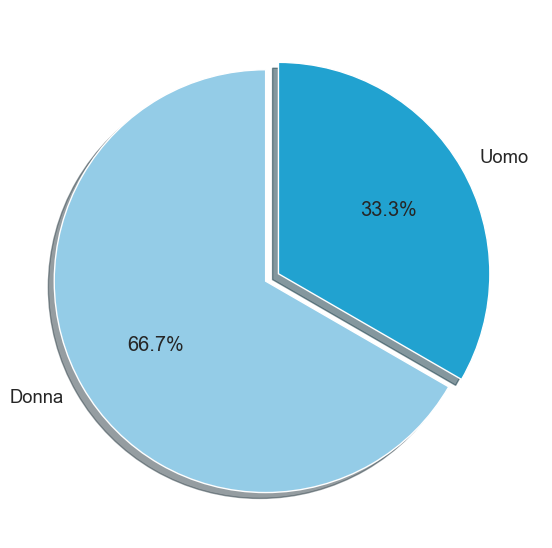

In [11]:
# Using sex instaed of gende
labels = ['Donna', 'Uomo']
sizes = df_user['Sesso'].value_counts()

# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes))
explode[np.where(sizes.index == sizes.idxmax())[0][0]] = 0.07
fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)

ax.pie(sizes, explode=explode, labels = labels, autopct='%1.1f%%', shadow = True, startangle = 90, colors = palette_c[1:3])
plt.show()


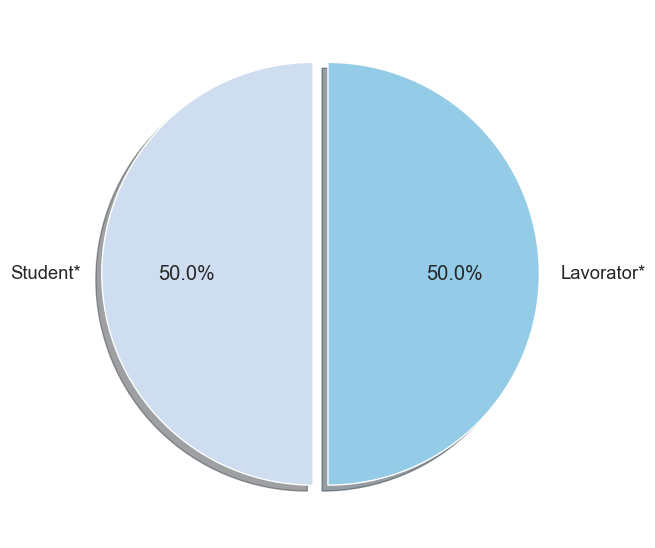

In [12]:
# job stats
labels = df_user['Lavoro'].value_counts().index
sizes = df_user['Lavoro'].value_counts()

# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes))
explode[np.where(sizes.index == sizes.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes, explode=explode, labels = labels, autopct='%1.1f%%', shadow = True, startangle = 90, colors = palette_c)
plt.show()

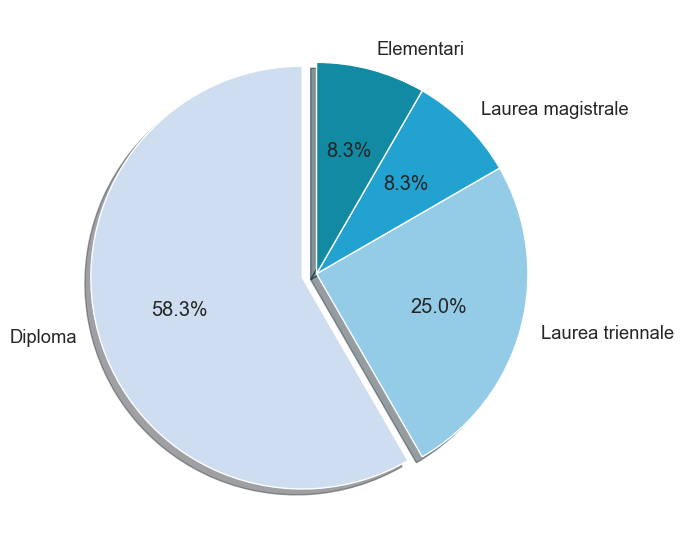

In [13]:
# education stats
labels = df_user['Istruzione'].value_counts().index
sizes = df_user['Istruzione'].value_counts()

# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes))
explode[np.where(sizes.index == sizes.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%', shadow = True, startangle = 90, colors = palette_c)
plt.show()

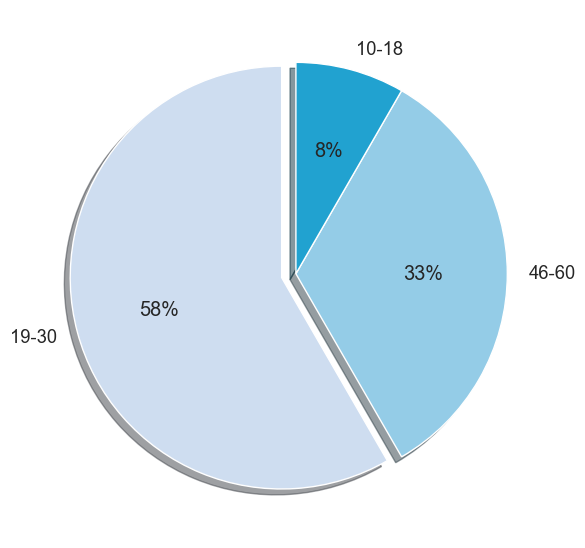

In [14]:
# age stats
age_class = [10, 18, 30, 45, 60, 110]
labels = ['10-18', '19-30', '31-45', '46-60', '60+']
df_age = pd.DataFrame({'age': df_user['Eta'], 'group': pd.cut(df_user['Eta'], bins = age_class, labels = labels, right=False)})

sizes = df_age['group'].value_counts()
sizes = sizes[sizes != 0] # drop 0 value
labels = list(sizes.index)

# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes))
explode[np.where(sizes.index == sizes.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes, explode = explode, labels = labels, autopct='%1.0f%%', shadow = True, startangle = 90, colors = palette_c)
plt.show()

# Questionario euristiche stats:

In [15]:
## inizio statistiche su questionario

# df_q = pd.read_csv('./Questionario valutazione euristica.csv')
# df_q.columns
# df_q = df_q.drop(['Informazioni cronologiche', 'Nome utente'], axis = 1)
# 
# df_qq = pd.DataFrame()
# for ele in df_q.columns:
#     row = [ele]
#     row.extend([int(asd[0]) for asd in df_q[ele].tolist()])
#     df_qq = df_qq.append(pd.DataFrame([row]), ignore_index=True)
# df_qq['Euristiche'] = ''
# df_qq['Id valutatori'] = ''
# df_qq.columns = ['Problema', 'expert1', 'expert2', 'expert3', 'expert4', 'expert5', 'Euristiche', 'Id valutatori']
# df_qq

In [16]:
# mean and sd

#df_qq['mean'] = df_qq.loc
# df_qq['mean'] = df_qq.loc[:, 'expert1':'expert5'].mean(axis=1)
# df_qq['std'] = df_qq.loc[:, 'expert1':'expert5'].std(axis=1)
# df_qq['median'] = df_qq.loc[:, 'expert1':'expert5'].median(axis=1)
# df_qq.to_csv('./Risultato questionario euristica.csv')
# df_qq

In [17]:
# a = pd.read_csv('./Euristiche tidal.csv', sep = ';')
# a['ID euristiche violate']

In [18]:
# eu = pd.read_csv('./eu.csv')
# idd = pd.read_csv('./ID.csv')
# # df_qq.iloc[23:,:]['Euristiche'] = b['ID euristiche violate']
# # display(eu)
# # display(idd)
# df_qq['Euristiche'] = eu['hello']
# df_qq['Id valutatori'] = idd['hi']
# df_qq.to_csv('./Risultato questionario euristica.csv')

In [19]:
# Splitting into two df, one for tidal and the oth for apple music 

# quest = pd.read_csv('./Risultato questionario euristica.csv')
# quest = quest.drop(['Unnamed: 0'], axis = 1)
# # quest.nlargest(4, 'mean')
# quest_0 = quest.iloc[:23, :]
# quest_1 = quest.iloc[23:, :]
# quest_0.to_csv('./Quest eu Tidal.csv')
# quest_1.to_csv('./Quest eu Apple Music.csv')

In [20]:
# matrice valutatori
def matrice_valutatori(app_name):
    quest1 = pd.read_csv('./Quest eu ' + app_name + '.csv', index_col=0)

    # creo un df vuoto per la matrice valutatori
    matrix1 = pd.DataFrame(columns = quest1.index.tolist(), index = ['EU1', 'EU2', 'ED1', 'ED2', 'ED3'])

    # costruisco la matrice valutatori
    for index, row in quest1.iterrows():
        valutatori = row['Id valutatori'].split('-')
        for val in valutatori:
            matrix1.loc[val, index] = 1

    matrix1 = matrix1.fillna(0)
    display(matrix1)

    # ordino la matrice valutatori
    idx = matrix1.sum(axis=1).sort_values(ascending=False).index
    print('----------------------------------------------')
    print(f'Top valutatori: {", ".join(idx.to_list())}')
    print('----------------------------------------------')
    ordered_matrix1 = matrix1.loc[idx]
    print('Matrice valutatori ordinata:')
    display(ordered_matrix1)
    return ordered_matrix1

print(f'______________{app[0].upper()}:')
matrix_applemusic = matrice_valutatori(app[0])
print('\n\n\n\n')
print(f'______________{app[1].upper()}:')
matrix_tidal = matrice_valutatori(app[1])


______________APPLE MUSIC:


,EM1,EM2,EM3,EM4,EM5,EM6,EM7,EM8,EM9,EM10,...,EM21,EM22,EM23,EM24,EM25,EM26,EM27,EM28,EM29,EM30
EU1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
EU2,0,0,0,0,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
ED1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,0
ED2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,1,1
ED3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


----------------------------------------------
Top valutatori: EU2, EU1, ED1, ED2, ED3
----------------------------------------------
Matrice valutatori ordinata:


,EM1,EM2,EM3,EM4,EM5,EM6,EM7,EM8,EM9,EM10,...,EM21,EM22,EM23,EM24,EM25,EM26,EM27,EM28,EM29,EM30
EU2,0,0,0,0,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
EU1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ED1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,0
ED2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,1,1
ED3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0







______________TIDAL:


,ET1,ET2,ET3,ET4,ET5,ET6,ET7,ET8,ET9,ET10,...,ET14,ET15,ET16,ET17,ET18,ET19,ET20,ET21,ET22,ET23
EU1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
EU2,0,1,1,1,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
ED1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
ED2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,1,1,0,0
ED3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,1


----------------------------------------------
Top valutatori: EU1, EU2, ED2, ED1, ED3
----------------------------------------------
Matrice valutatori ordinata:


,ET1,ET2,ET3,ET4,ET5,ET6,ET7,ET8,ET9,ET10,...,ET14,ET15,ET16,ET17,ET18,ET19,ET20,ET21,ET22,ET23
EU1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
EU2,0,1,1,1,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
ED2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,1,1,0,0
ED1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
ED3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,1


Apple music


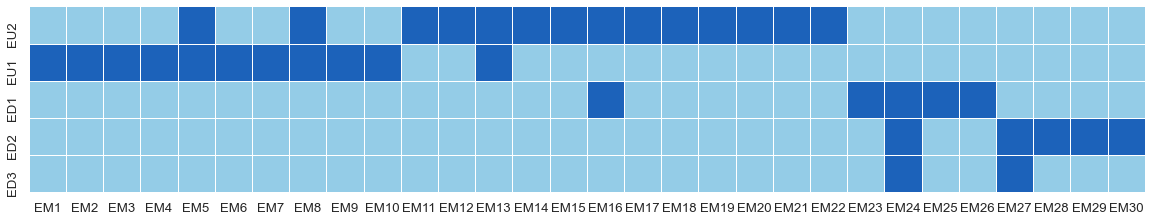

In [21]:
# grafico matrice valutatori apple music
print('Apple music')
myColors = (palette_c[1], palette_c[2], palette_c[4])

sns.set(font_scale=1.2)
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
fig, ax = plt.subplots(figsize = (20, 5)) 
ax = sns.heatmap(matrix_applemusic, linewidths=.5, fmt='g', cmap=cmap, ax = ax, cbar = False, square = True)

Tidal


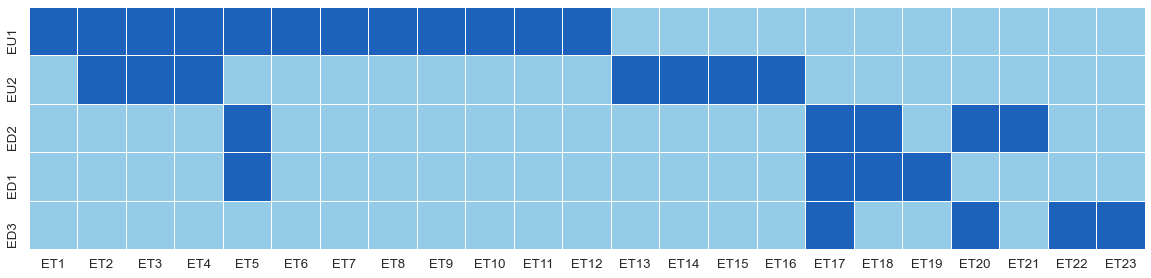

In [22]:
# grafico matrice valutatori apple music
print('Tidal')
myColors = (palette_c[1], palette_c[2], palette_c[4])

sns.set(font_scale=1.2)
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
fig, ax = plt.subplots(figsize = (20, 5)) 
ax = sns.heatmap(matrix_tidal, linewidths=.5, fmt='g', cmap=cmap, ax = ax, cbar = False, square = True)

Apple Music


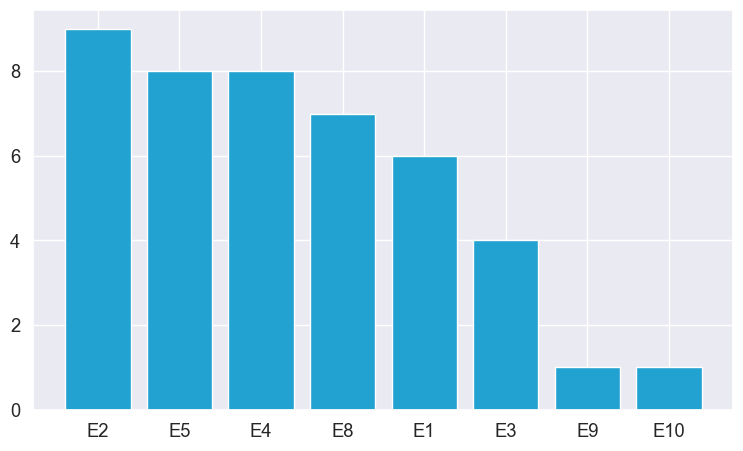

Tidal


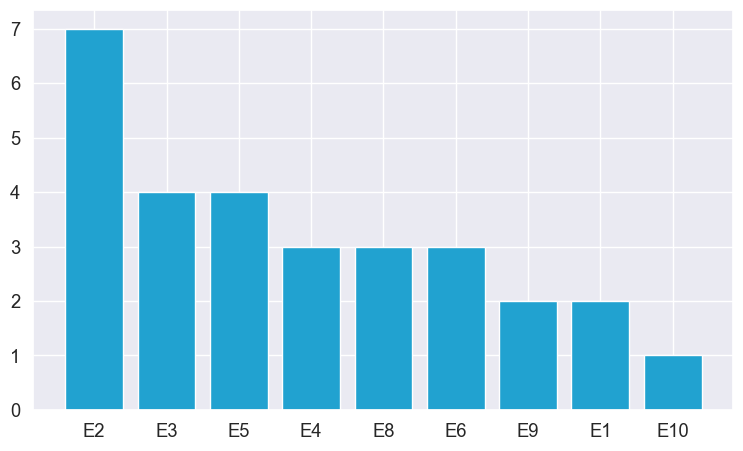

In [23]:
# distribuzione euristiche

def plot_eu_distribution(app_name):
    quest1 = pd.read_csv('./Quest eu ' + app_name + '.csv', index_col=0)
    list_eu = []
    for eu in quest1['Euristiche']:
        list_eu.extend(eu.split('-'))

    from collections import Counter, OrderedDict

    c = Counter(list_eu)
    # ordered by value
    c_ord = dict(sorted(c.items(), key=lambda item: item[1], reverse = True))

    fig = plt.figure(figsize = (7, 4), dpi = 100)
    ax = fig.add_axes([0, 0, 1, 1])
    plt.bar(c_ord.keys(), c_ord.values(), color = palette_c[2])
    plt.show()

print(f'{app[0]}')
plot_eu_distribution(app[0])
print(f'{app[1]}')
plot_eu_distribution(app[1])

In [24]:
# prioritizzazione euristiche

def prioritizzazione_eu(app_name):
    quest1 = pd.read_csv('./Quest eu ' + app_name + '.csv', index_col=0)
    top_problems = []
    no_top_problems = []
    for expert in quest1.columns[1:6]:
        # print(f'Expert: {expert}')
        # top 6 problems (20% di 30 euristiche)
        tmp = quest1.sort_values(expert, ascending = False)[:6].index.tolist()
        top_problems.extend(tmp)
        # the rest:
        tmp = quest1.sort_values(expert, ascending = False)[6:].index.tolist()
        no_top_problems.extend(tmp)

    # count number of time a problem appears on top or not
    c_top = dict(Counter(top_problems))
    c_no_top = dict(Counter(no_top_problems))

    df_fascia = pd.DataFrame(0, index = quest1.index, columns = ['volte prima fascia', 'volte seconda fascia', 'fascia finale'])
    for ele in c_top:
        df_fascia.loc[ele]['volte prima fascia'] += c_top[ele]

    for ele in c_no_top:
        df_fascia.loc[ele]['volte seconda fascia'] += c_no_top[ele]

    df_fascia['p-value'] = float(0.0)
    for index, _ in df_fascia.iterrows():
        p_value = stats.binom_test(df_fascia.at[index, 'volte prima fascia'], n = 5, p = 0.5)
        df_fascia.at[index, 'p-value'] = p_value
        if df_fascia.at[index, 'volte prima fascia'] > df_fascia.at[index, 'volte seconda fascia']:
            df_fascia.at[index, 'fascia finale'] = -1
        else:
            df_fascia.at[index, 'fascia finale'] = -2

    

    return df_fascia

print(f'{app[0]}:')
display(prioritizzazione_eu(app[0]).sort_values('fascia finale', ascending = False))
print('\n______________________________\n')
print(f'{app[1]}:')
display(prioritizzazione_eu(app[1]).sort_values('fascia finale', ascending = False))

Apple Music:


,volte prima fascia,volte seconda fascia,fascia finale,p-value
EM1,4,1,-1,0.3750
EM4,3,2,-1,1.0000
EM28,3,2,-1,1.0000
EM15,3,2,-1,1.0000
EM17,1,4,-2,0.3750
EM29,1,4,-2,0.3750
EM27,1,4,-2,0.3750
EM26,0,5,-2,0.0625
EM25,1,4,-2,0.3750
EM24,1,4,-2,0.3750



______________________________

Tidal:


,volte prima fascia,volte seconda fascia,fascia finale,p-value
ET23,3,2,-1,1.0000
ET20,4,1,-1,0.3750
ET11,4,1,-1,0.3750
ET2,5,0,-1,0.0625
ET14,0,5,-2,0.0625
ET22,0,5,-2,0.0625
ET21,1,4,-2,0.3750
ET19,1,4,-2,0.3750
ET18,2,3,-2,1.0000
ET17,1,4,-2,0.3750


In [25]:

quest1 = pd.read_csv('./Quest eu ' + app[0] + '.csv', index_col=0)
quest1

,Problema,expert1,expert2,expert3,expert4,expert5,Euristiche,Id valutatori,mean,std,median
EM1,1 - La forma dell'icona di download al fianco ...,3,3,2,2,3,E5,EU1,2.6,0.547723,3.0
EM2,2 - Quando si inserisce una canzone in coda ma...,3,3,2,1,4,E8-E9,EU1,2.6,1.140175,3.0
EM3,3 - Quando si riproduce una canzone viene aper...,3,4,1,3,3,E3,EU1,2.8,1.095445,3.0
EM4,"4 - Nella sezione ""radio"" sono raccolte sia tr...",4,3,4,3,3,E4-E5-E8,EU1,3.4,0.547723,3.0
EM5,"5 - Nella sezione ""permessi per app di terze ...",2,3,2,1,1,E4,EU1-EU2,1.8,0.836660,2.0
EM6,6 - Non è presente una guida o una documentazi...,3,0,1,2,1,E10,EU1,1.4,1.140175,1.0
EM7,7 - Quando elimino un brano dalla playlist l'e...,2,4,3,3,3,E1-E4,EU1,3.0,0.707107,3.0
EM8,"8 - Nelle opzioni di una canzone il pulsante ""...",3,3,2,3,2,E3,EU1-EU2,2.6,0.547723,3.0
EM9,9 - Quando mi trovo nella schermata riproduzio...,2,3,2,0,3,E2,EU1,2.0,1.224745,2.0
EM10,"10 - Nella sezione ""altro"" delle impostazioni ...",0,2,2,2,1,E3-E4,EU1,1.4,0.894427,2.0


In [26]:
quest2 = pd.read_csv('./Quest eu ' + app[1] + '.csv', index_col=0)
quest2

,Problema,expert1,expert2,expert3,expert4,expert5,Euristiche,Id valutatori,mean,std,median
ET1,"1 - La sezione ""esplora"" ha una struttura diff...",2,2,2,0,0,E4,EU1,1.2,1.095445,2.0
ET2,2 - Dopo aver attivato la modalità offline nel...,3,4,4,4,4,E3-E9,EU1-EU2,3.8,0.447214,4.0
ET3,3 - Nelle impostazioni ogni pulsante quando vi...,2,2,2,2,2,E1,EU1-EU2,2.0,0.000000,2.0
ET4,4 - Non è presente alcuna documentazione o tut...,3,0,2,2,1,E10,EU1-EU2,1.6,1.140175,2.0
ET5,5 - Nella schermata di riproduzione di una can...,2,1,3,1,3,E8,EU1-ED1-ED2,2.0,1.000000,2.0
ET6,6 - Quando vengono effettuati dei cambiamenti ...,1,2,2,3,2,E2,EU1,2.0,0.707107,2.0
ET7,7 - Durante la riproduzione di un video in ori...,2,2,2,3,2,E3,EU1,2.2,0.447214,2.0
ET8,"8 - Nella schermata riproduzione il pulsante ""...",2,2,3,3,3,E4,EU1,2.6,0.547723,3.0
ET9,"9 - Nella sezione ""esplora"" sono presenti dive...",2,2,1,1,0,E4,EU1,1.2,0.836660,1.0
ET10,10 - Quando si modificano le informazioni del ...,2,3,3,2,2,E3-E1,EU1,2.4,0.547723,2.0
